### Importing Libraries and Model

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [244]:
# Model from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor

# Model Evaluations and tools
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Saving and loading model
from joblib import dump, load

### Exploratory Data Analysis

In [245]:
sp = pd.read_csv("SolarPrediction.csv")

In [246]:
sp.head(10)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
5,1475227824,9/29/2016 12:00:00 AM,23:30:24,1.21,48,30.46,64,120.20,5.62,06:13:00,18:13:00
6,1475227519,9/29/2016 12:00:00 AM,23:25:19,1.20,49,30.46,72,112.45,6.75,06:13:00,18:13:00
7,1475227222,9/29/2016 12:00:00 AM,23:20:22,1.24,49,30.46,71,122.97,5.62,06:13:00,18:13:00
8,1475226922,9/29/2016 12:00:00 AM,23:15:22,1.23,49,30.46,80,101.18,4.50,06:13:00,18:13:00
9,1475226622,9/29/2016 12:00:00 AM,23:10:22,1.21,49,30.46,85,141.87,4.50,06:13:00,18:13:00


In [247]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [248]:
len(sp), sp.shape

(32686, (32686, 11))

In [249]:
sp.isna().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [250]:
sp.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


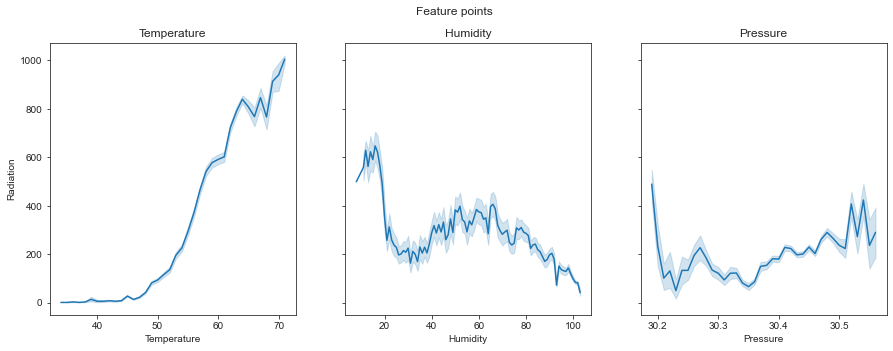

In [251]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Feature points')

# Temperature
sns.lineplot(ax=axes[0], x=sp['Temperature'].values, y=sp['Radiation'].values)
axes[0].set(xlabel='Temperature', ylabel = 'Radiation')
axes[0].set_title(sp['Temperature'].name)
# Humidity
sns.lineplot(ax=axes[1], x=sp['Humidity'].values, y=sp['Radiation'].values)
axes[1].set(xlabel='Humidity', ylabel = 'Radiation')
axes[1].set_title(sp['Humidity'].name)

# Pressure
sns.lineplot(ax=axes[2],  x=sp['Pressure'].values, y=sp['Radiation'].values)
axes[2].set(xlabel='Pressure', ylabel = 'Radiation')
axes[2].set_title(sp['Pressure'].name);


In [252]:
import datetime

#Date

sp['Year'] = pd.DatetimeIndex(sp['Data']).year
sp['Month'] = pd.DatetimeIndex(sp['Data']).month
sp['Day'] = pd.DatetimeIndex(sp['Data']).day
sp.head()

#Time 

sp['Hour'] = pd.DatetimeIndex(sp['Time']).hour
sp['Minute'] = pd.DatetimeIndex(sp['Time']).minute
sp['Second'] = pd.DatetimeIndex(sp['Time']).second

sp.head()


sp['SunPerDay'] = pd.DatetimeIndex(sp['TimeSunSet']) - pd.DatetimeIndex(sp['TimeSunRise'])
sp.head()

sp['SunPerDayHours'] = pd.DatetimeIndex(sp['TimeSunSet']).hour - pd.DatetimeIndex(sp['TimeSunRise']).hour 

In [253]:
sp.drop('Time', axis = 1, inplace=True)
sp.drop('Data', axis = 1, inplace=True)
sp.drop('TimeSunRise', axis = 1, inplace=True)
sp.drop('TimeSunSet', axis = 1, inplace=True)
sp.drop('SunPerDay', axis = 1, inplace=True)

sp.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Year,Month,Day,Hour,Minute,Second,SunPerDayHours
0,1475229326,1.21,48,30.46,59,177.39,5.62,2016,9,29,23,55,26,12
1,1475229023,1.21,48,30.46,58,176.78,3.37,2016,9,29,23,50,23,12
2,1475228726,1.23,48,30.46,57,158.75,3.37,2016,9,29,23,45,26,12
3,1475228421,1.21,48,30.46,60,137.71,3.37,2016,9,29,23,40,21,12
4,1475228124,1.17,48,30.46,62,104.95,5.62,2016,9,29,23,35,24,12


In [254]:
sp.corr()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Year,Month,Day,Hour,Minute,Second,SunPerDayHours
UNIXTime,1.000000,-0.081286,-0.369169,-0.332016,-0.063117,0.152613,0.173860,NaN,0.968235,0.286457,0.001056,0.000406,0.231002,-0.818884
Radiation,-0.081286,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627,NaN,-0.095450,0.039978,0.004398,-0.000730,-0.031270,0.048719
Temperature,-0.369169,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458,NaN,-0.354560,-0.123705,0.197464,-0.001934,-0.036147,0.300920
Pressure,-0.332016,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639,NaN,-0.341759,-0.024633,0.091069,0.001860,-0.031102,0.151939
Humidity,-0.063117,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624,NaN,-0.068854,0.014637,0.077899,0.000499,-0.027682,0.145143
WindDirection(Degrees),0.152613,-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092,NaN,0.181485,-0.082354,-0.077969,-0.000602,-0.032568,-0.078540
Speed,0.173860,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000,NaN,0.150822,0.117337,-0.057939,0.000192,-0.032934,-0.159384
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,0.968235,-0.095450,-0.354560,-0.341759,-0.068854,0.181485,0.150822,NaN,1.000000,0.038027,-0.005396,0.000168,0.220563,-0.784783
Day,0.286457,0.039978,-0.123705,-0.024633,0.014637,-0.082354,0.117337,NaN,0.038027,1.000000,-0.008010,-0.000196,0.089078,-0.263575


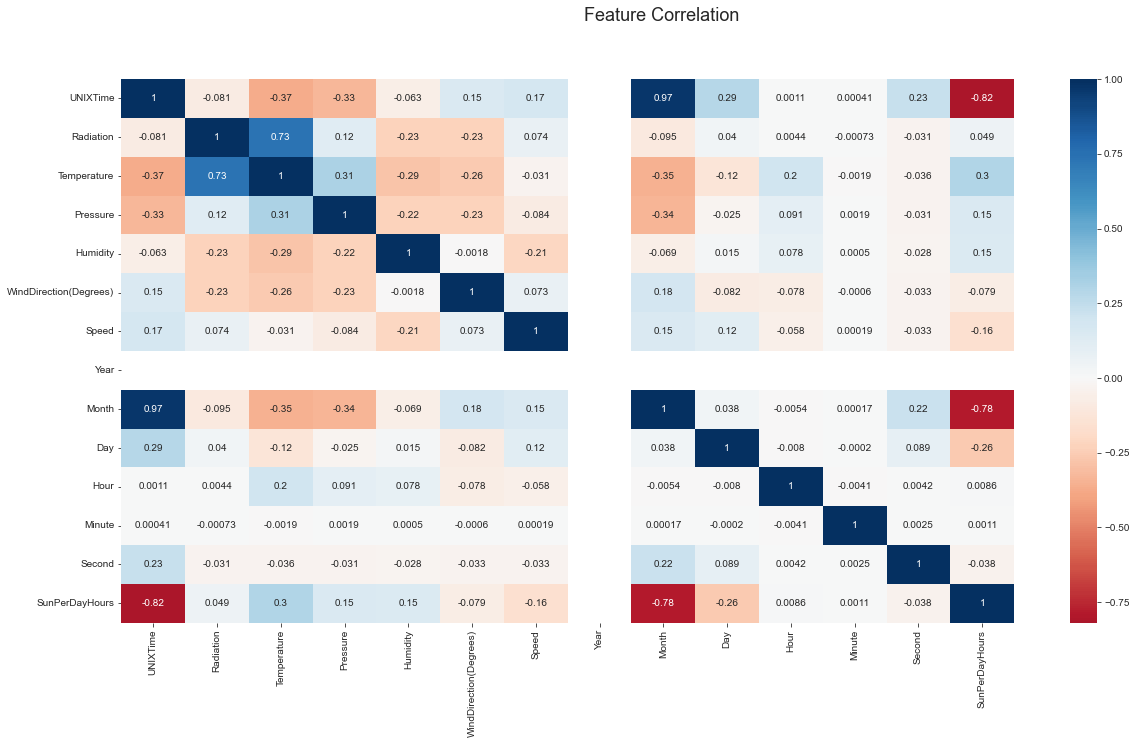

In [255]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Feature Correlation', fontsize=18)
sns.heatmap(sp.corr(), annot=True, cmap='RdBu', center=0);

In [256]:
sp.drop('UNIXTime', axis = 1, inplace=True)
sp.drop('Year', axis = 1, inplace=True)

In [257]:
sp.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,SunPerDayHours
0,1.21,48,30.46,59,177.39,5.62,9,29,23,55,26,12
1,1.21,48,30.46,58,176.78,3.37,9,29,23,50,23,12
2,1.23,48,30.46,57,158.75,3.37,9,29,23,45,26,12
3,1.21,48,30.46,60,137.71,3.37,9,29,23,40,21,12
4,1.17,48,30.46,62,104.95,5.62,9,29,23,35,24,12


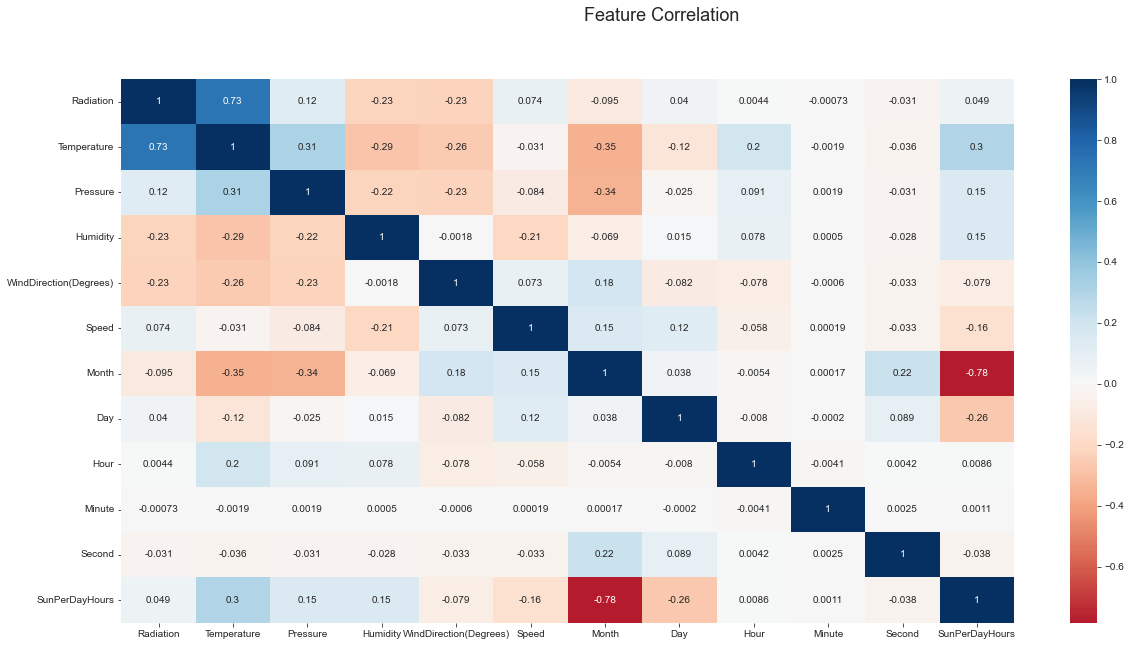

In [258]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Feature Correlation', fontsize=18)
sns.heatmap(sp.corr(), annot=True, cmap='RdBu', center=0);

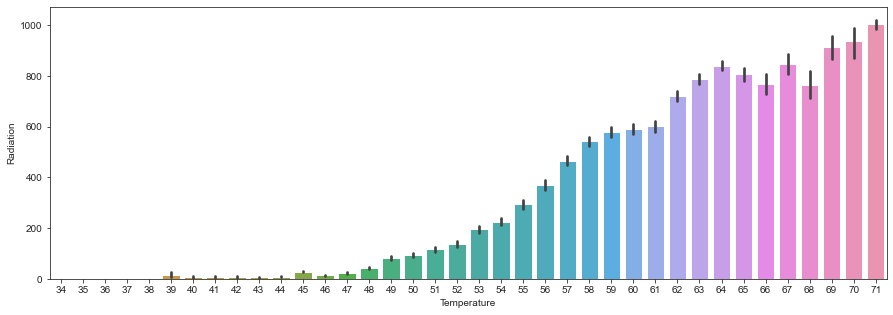

In [259]:
fig2 = plt.figure(figsize=(15,5))
sns.barplot(x=sp['Temperature'],y=sp['Radiation']);

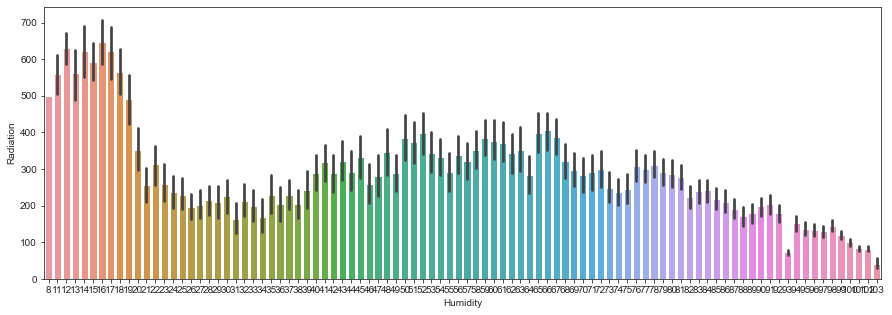

In [260]:
fig3 = plt.figure(figsize=(15,5))
sns.barplot(x=sp['Humidity'],y=sp['Radiation']);

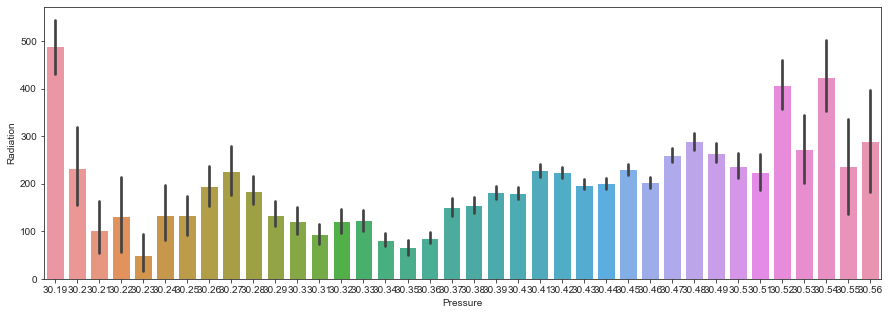

In [261]:
fig3 = plt.figure(figsize=(15,5))
sns.barplot(x=sp['Pressure'],y=sp['Radiation']);

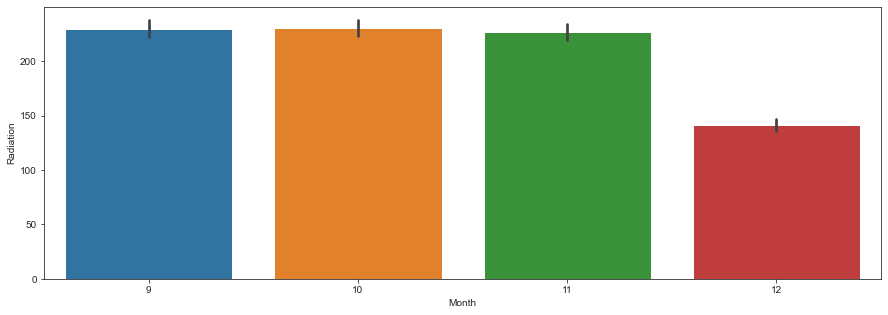

In [262]:
fig3 = plt.figure(figsize=(15,5))
sns.barplot(x=sp['Month'],y=sp['Radiation']);

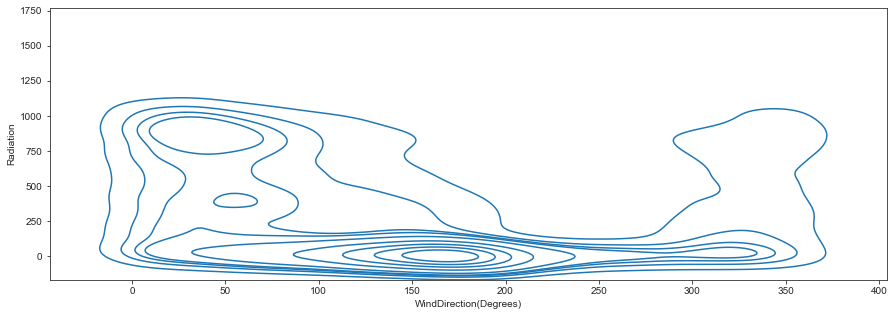

In [263]:
fig4 = plt.figure(figsize=(15,5))
sns.kdeplot(x=sp['WindDirection(Degrees)'],y=sp['Radiation']);

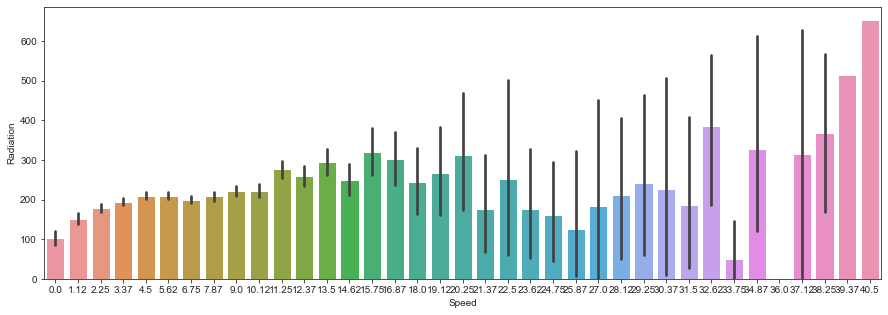

In [264]:
fig4 = plt.figure(figsize=(15,5))
sns.barplot(x=sp['Speed'],y=sp['Radiation']);


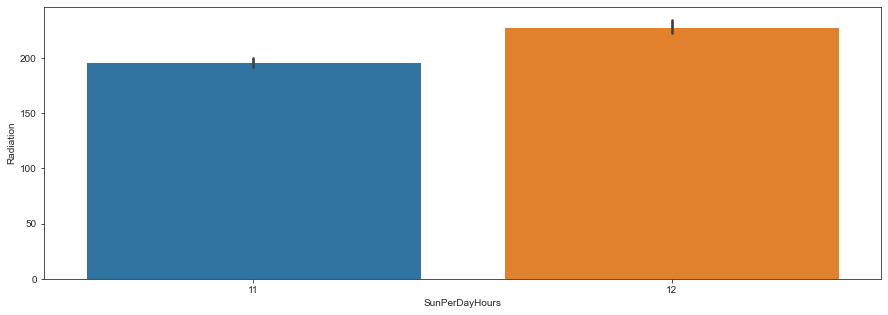

In [265]:
fig4 = plt.figure(figsize=(15,5))
sns.barplot(x=sp['SunPerDayHours'],y=sp['Radiation']);


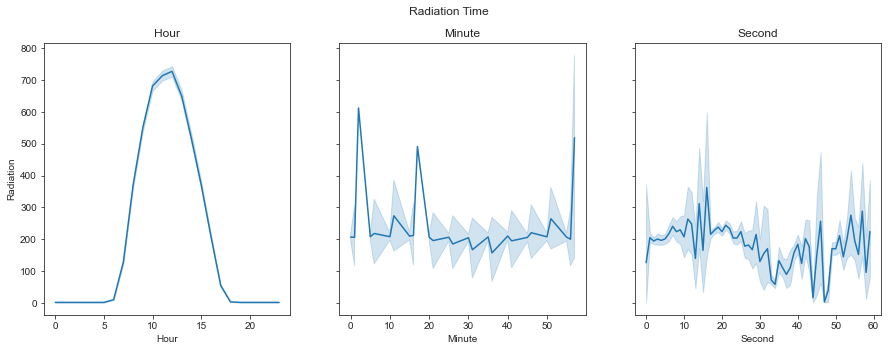

In [266]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Radiation Time')

sns.lineplot(ax=axes[0], x=sp['Hour'].values, y=sp['Radiation'].values)
axes[0].set(xlabel='Hour', ylabel = 'Radiation')
axes[0].set_title(sp['Hour'].name)

sns.lineplot(ax=axes[1], x=sp['Minute'].values, y=sp['Radiation'].values)
axes[1].set(xlabel='Minute', ylabel = 'Radiation')
axes[1].set_title(sp['Minute'].name)


sns.lineplot(ax=axes[2],  x=sp['Second'].values, y=sp['Radiation'].values)
axes[2].set(xlabel='Second', ylabel = 'Radiation')
axes[2].set_title(sp['Second'].name);

## ML MODEL

In [267]:
sp.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,SunPerDayHours
0,1.21,48,30.46,59,177.39,5.62,9,29,23,55,26,12
1,1.21,48,30.46,58,176.78,3.37,9,29,23,50,23,12
2,1.23,48,30.46,57,158.75,3.37,9,29,23,45,26,12
3,1.21,48,30.46,60,137.71,3.37,9,29,23,40,21,12
4,1.17,48,30.46,62,104.95,5.62,9,29,23,35,24,12


In [268]:
#Random seed
np.random.seed(42)

#split the data
X = sp.drop('Radiation', axis=1)
y = sp['Radiation']

In [269]:
X.head()

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,SunPerDayHours
0,48,30.46,59,177.39,5.62,9,29,23,55,26,12
1,48,30.46,58,176.78,3.37,9,29,23,50,23,12
2,48,30.46,57,158.75,3.37,9,29,23,45,26,12
3,48,30.46,60,137.71,3.37,9,29,23,40,21,12
4,48,30.46,62,104.95,5.62,9,29,23,35,24,12


In [270]:
y.head()

0    1.21
1    1.21
2    1.23
3    1.21
4    1.17
Name: Radiation, dtype: float64

In [271]:
#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26148, 11), (6538, 11), (26148,), (6538,))

In [272]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [273]:
#Making predictions
y_preds = model.predict(X_test)
y_preds[:20]

array([673.4993, 815.8548,   1.2269,   3.7569,   1.2207, 542.5867,
         1.2921,   1.2448, 705.0543, 117.1648, 126.3148,   1.2136,
         1.2072,   1.2626,  48.2073,   1.228 , 602.6768,   1.3082,
         2.1153,   1.9898])

In [274]:
df_preds = pd.DataFrame()
df_preds["Actual Value"] = y_test
df_preds["Predicted value"] = y_preds
df_preds

,Actual Value,Predicted value
22107,675.86,673.4993
3780,1286.85,815.8548
13651,1.23,1.2269
30473,4.43,3.7569
9084,1.22,1.2207
...,...,...
23966,1.23,1.2050
3827,269.27,219.5117
3350,1.25,1.2481
29471,1.26,1.2897


In [275]:
df_preds.head(20)

,Actual Value,Predicted value
22107,675.86,673.4993
3780,1286.85,815.8548
13651,1.23,1.2269
30473,4.43,3.7569
9084,1.22,1.2207
12469,546.85,542.5867
30320,1.27,1.2921
13664,1.24,1.2448
9538,711.09,705.0543
25467,84.23,117.1648


In [276]:
df = pd.DataFrame(data={"actual values":y_test,
                       "predicted values":y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(20)

,actual values,predicted values,differences
22107,675.86,673.4993,-2.3607
3780,1286.85,815.8548,-470.9952
13651,1.23,1.2269,-0.0031
30473,4.43,3.7569,-0.6731
9084,1.22,1.2207,0.0007
12469,546.85,542.5867,-4.2633
30320,1.27,1.2921,0.0221
13664,1.24,1.2448,0.0048
9538,711.09,705.0543,-6.0357
25467,84.23,117.1648,32.9348


In [277]:
r2_score(y_test, y_test)

1.0

In [278]:
#Evaluating model's predictions
print ("Regression model metrics on test set")
print(f'R^2: {r2_score(y_test, y_preds)}')
print(f'MAE: {mean_absolute_error(y_test, y_preds)}')
print(f'MSE: {mean_squared_error(y_test, y_preds)}')

Regression model metrics on test set
R^2: 0.9319760719789631
MAE: 31.47190347200978
MSE: 6757.9594828448035


### Improving Model

In [279]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [280]:
np.random.seed(42)

sp_shuffled = sp.sample(frac=1)
X =  sp_shuffled.drop(['Radiation'], axis=1)
y = sp_shuffled['Radiation']

train_split = round(0.7 * len(sp_shuffled)) 
valid_split = round(train_split + 0.15 * len(sp_shuffled)) 

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [281]:

grid ={"n_estimators":[10, 100, 200, 500, 1000, 1200],
      "max_depth":[None, 5,10,20,30],
      "max_features": ["auto", "sqrt"],
      "min_samples_split": [2,4,6],
      "min_samples_leaf": [1,2,4]}

In [282]:
np.random.seed(42)

X = sp_shuffled.drop(['Radiation'], axis=1)
y = sp_shuffled['Radiation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_jobs=1)

rs_model = RandomizedSearchCV(estimator=model,
                          param_distributions=grid,
                          n_iter = 10,
                          cv=5,
                          verbose=2)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time= 1.2min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time= 1.1min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time= 1.1min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time= 1.1min
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time= 1.1min
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=  59.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=  58.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimat

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [283]:
rs_model.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20}

In [284]:
#make predictions with the best hyperparameters
rs_y_preds = rs_model.predict(X_test)

#evalute the predictions
print ("Regression model metrics on test set")
print(f'R^2: {r2_score(y_test, rs_y_preds)}')
print(f'MAE: {mean_absolute_error(y_test, rs_y_preds)}')
print(f'MSE: {mean_squared_error(y_test, rs_y_preds)}')

Regression model metrics on test set
R^2: 0.9441628010504592
MAE: 29.328165035662177
MSE: 5522.276781006788


In [285]:
# Save model to file
dump(model, filename="sp_random_forest_model.joblib")

['sp_random_forest_model.joblib']